$\large{\text{Optimality conditions for unconstrained problems}}$

Recall that in linear regression and logistic regression, we discussed unconstrained optimization problems of the form (OP): 

$
\min_\theta f(\theta)
$

where $f:{\mathbb{R}}^n \to {\mathbb{R}}$ is differentiable. Note that in logistic regression, the optimization problem was a maximization problem. However since every maximization problem can be written as an equivalent minimization problem, we will consider without loss of generality, minimization problems here.  

Then the necessary condition for $\theta^\star$ to be a minimizer of problem (OP) is that the gradient of $f$ at $\theta^\star$ is the zero vector:

$
\nabla_\theta f(\theta^\star) = \mathbf{0}. 
$

Further if $f$ is convex, the zero-gradient condition above is also a sufficient condition for optimality. 


$\large{\text{Motivating optimality conditions for constrained optimization problems}}$

Consider the optimization problem 

$
\min_{\theta \in {\mathbb{R}}^n} f(\theta)  \ \text{s.t.} \ g(\theta)=0.
$

As an example, consider the following optimization problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2=4
$

where $\theta = (x,y)$, objective function is $f(x,y)= \frac{1}{2} (x-1)^2 + 4 (y-2)^2$ and constraint is $g(x,y) = (x-2.5)^2+(y-2)^2-4$. Note that there is a single equality constraint which is in the form of a circle.

In the figure below, we can visualize the contours of the objective function and the circle. The gradient fields are also represented in the figure. 

In [6]:
#@title
import numpy as np
import matplotlib.pyplot as plt

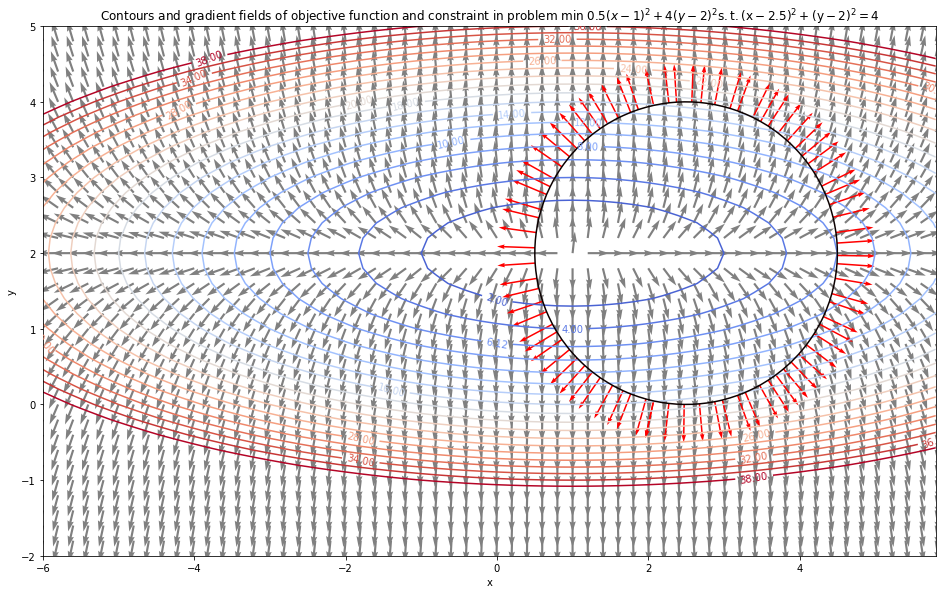

In [ ]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2
u = (x-1)
v = 8*(y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4
u1 = 2*(x1-2.5)
v1 = 2*(y1-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((u1, v1)), axis=0)
u1 = u1 / norm1
v1 = v1 / norm1

fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, u, v, units='xy', scale=3.5, color='gray')
obj_fn_level_vals = np.arange(0.,40.,2)
obj_fn_level_vals[obj_fn_level_vals == 6] = 6.125 #contour for optimal objective function value
contour_obj = ax.contour(x, y, z, obj_fn_level_vals, cmap='coolwarm')

contours_circle = ax.contour(x1, y1, z1, [0.0], cmap='hot')
#ax.quiver(x1, y1, u1, v1, units='xy', scale=5, color='red')

for item in contours_circle.collections:
   for i in item.get_paths():
      v = i.vertices
      contour_circle_x = v[:, 0]
      contour_circle_y = v[:, 1]
      #print(contour_x, contour_y)
contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),2)

#print(idx)
ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='red', width=0.02)

ax.set_ylim(-2,5)
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.clabel(contour_obj, inline=1, fontsize=10)
ax.set_title(r'Contours and gradient fields of objective function and constraint in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4$');


In the figure below, we visualize the behavior of gradients of objective function and constraint. 

At the optimal point represented by a red dot below, we can visualize the alignment of the gradient of the objective function (blue arrow) and gradient of the constraint (cyan arrow). 

We can see that the gradients are parallel to each other and aligned in the same direction. 

This observation motivates an optimality condition of the form: 

$
\nabla_\theta f(\theta^\star) = \lambda \nabla_\theta g(\theta^\star),
$

where $\lambda \in {\mathbb{R}}$. 


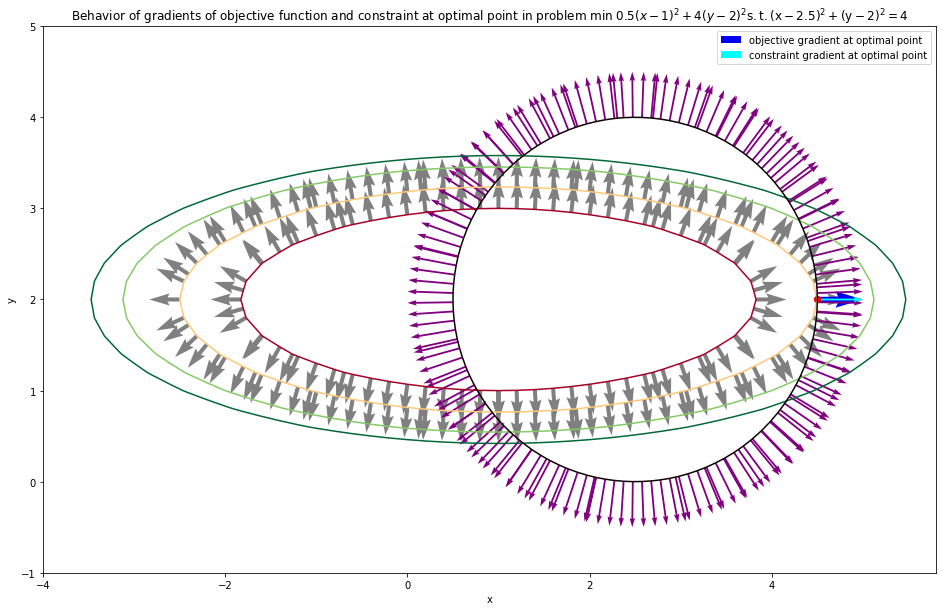

In [ ]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2
u = (x-1)
v = 8*(y-2)


# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4

fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
#ax.quiver(x, y, u, v, units='xy', scale=3.5, color='gray')
contours_paraboloid = ax.contour(x, y, z, [4, 6.125, 8.5, 10], cmap='RdYlGn')

count = 0

#contours_paraboloid.allsegs contains an empty array as the first element
#From second element onwards, the segment x-y coordinates are present
#print(contours_paraboloid.allsegs)

contour_paraboloid_x = [] 
contour_paraboloid_y = []

count = 0

for item in contours_paraboloid.allsegs:
  if count<2:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_paraboloid_x.append(v[:, 0])
    contour_paraboloid_y.append(v[:, 1])
  else:
    break
  count+=1

contour_paraboloid_x = np.concatenate(contour_paraboloid_x, axis=0) 
contour_paraboloid_y = np.concatenate(contour_paraboloid_y, axis=0) 

#add the optimal solution to the list 
#contour_paraboloid_x = np.append(contour_paraboloid_x,[4.5])
#contour_paraboloid_y = np.append(contour_paraboloid_y,[2.])

optimal_x = np.array([4.5])
optimal_y = np.array([2.0])

#print(contour_paraboloid_x)

#print(contour_paraboloid_x)
#print(contour_paraboloid_y)

contour_paraboloid_u = (contour_paraboloid_x-1)
contour_paraboloid_v = 8*(contour_paraboloid_y-2)
norm_paraboloid = np.linalg.norm(np.array((contour_paraboloid_u, contour_paraboloid_v)), axis=0)
contour_paraboloid_u = contour_paraboloid_u / norm_paraboloid
contour_paraboloid_v = contour_paraboloid_v / norm_paraboloid
ax.quiver(contour_paraboloid_x, contour_paraboloid_y, contour_paraboloid_u, contour_paraboloid_v, units='xy', scale=3, color='gray')

contour_paraboloid_u_opt = (optimal_x-1)
contour_paraboloid_v_opt = 8*(optimal_y-2)
#print(contour_paraboloid_u_opt)
#print(contour_paraboloid_v_opt)

norm_paraboloid_opt = np.linalg.norm(np.array((contour_paraboloid_u_opt, contour_paraboloid_v_opt)), axis=0)
#print(contour_paraboloid_opt)

contour_paraboloid_u_opt = contour_paraboloid_u_opt / norm_paraboloid_opt
contour_paraboloid_v_opt = contour_paraboloid_v_opt / norm_paraboloid_opt
ax.scatter(optimal_x, optimal_y,color='red')
ax.quiver(optimal_x, optimal_y, contour_paraboloid_u_opt, contour_paraboloid_v_opt, units='xy', scale=2, color='blue',width=0.06,label='objective gradient at optimal point')

contours_circle = ax.contour(x1, y1, z1, [0.0], cmap='hot')

contour_circle_x = [] 
contour_circle_y = []

count = 0
#print(contours_circle.allsegs)

for item in contours_circle.allsegs:
  if count==0:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_circle_x.append(v[:, 0])
    contour_circle_y.append(v[:, 1])
  else:
    break
  count+=1


#print('contour_circle_x',contour_circle_x)
#print('contour_circle_y',contour_circle_y)

contour_circle_x = np.array(contour_circle_x)
contour_circle_y = np.array(contour_circle_y)

#contour_circle_x = np.concatenate(contour_circle_x, axis=0) 
#contour_circle_y = np.concatenate(contour_circle_y, axis=0) 

contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# # # Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),40)

# print(idx)
ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='purple', width=0.02)

contour_circle_u_opt = 2*(optimal_x-2.5)
contour_circle_v_opt = 2*(optimal_y-2)

norm_circle_opt = np.linalg.norm(np.array((contour_circle_u_opt, contour_circle_v_opt)), axis=0)

contour_circle_u_opt = contour_circle_u_opt / norm_circle_opt
contour_circle_v_opt = contour_circle_v_opt / norm_circle_opt
ax.quiver(optimal_x, optimal_y, contour_circle_u_opt, contour_circle_v_opt, units='xy', scale=2, color='cyan',width=0.02, label='constraint gradient at optimal point')
ax.scatter(optimal_x, optimal_y,color='red')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title(r'Behavior of gradients of objective function and constraint at optimal point in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4$')

ax.set_ylim(-1,5)
ax.set_xlim(-4)

ax.legend();

$\large{\text{An example motivating optimality conditions for optimization problem with two equality constraints}}$

Consider the optimization problem 

$
\min_{\theta \in {\mathbb{R}}^n} f(\theta)  \ \text{s.t.} \ g_1(\theta)=0, g_2(\theta)=0.
$

As an example, consider the following optimization problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2=4, x+y=4,
$

where $\theta = (x,y)$, objective function is $f(x,y)= \frac{1}{2} (x-1)^2 + 4 (y-2)^2$ and constraints $g_1(x,y) = (x-2.5)^2+(y-2)^2-4$, $g_2(x,y) = x+y-4$. Note that we have added another equality constraint in the form of a line to the previous problem. 

In the figure below, we can visualize the contours of the objective function and the circle. The gradient fields are also represented in the figure. 

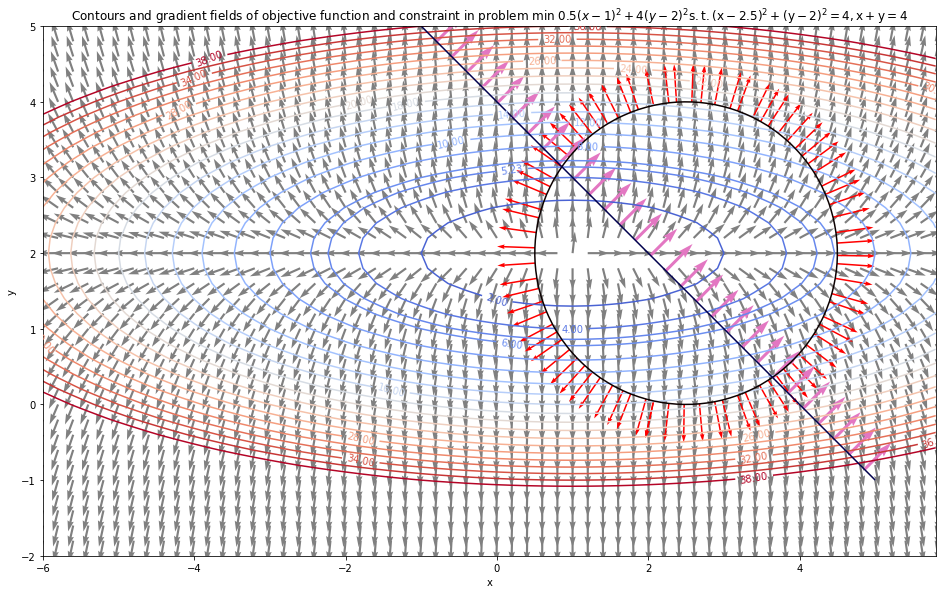

In [ ]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2
u = (x-1)
v = 8*(y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4
u1 = 2*(x1-2.5)
v1 = 2*(y1-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((u1, v1)), axis=0)
u1 = u1 / norm1
v1 = v1 / norm1

fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, u, v, units='xy', scale=3.5, color='gray')
obj_fn_level_vals = np.arange(0.,40.,2)
obj_fn_level_vals = np.sort(np.append(obj_fn_level_vals,[5.226191455200609]))#contour for optimal objective function value
#obj_fn_level_vals[obj_fn_level_vals == 6] = 6.125 
contour_obj = ax.contour(x, y, z, obj_fn_level_vals, cmap='coolwarm')

contours_circle = ax.contour(x1, y1, z1, [0.0], cmap='hot')
#ax.quiver(x1, y1, u1, v1, units='xy', scale=5, color='red')

for item in contours_circle.collections:
   for i in item.get_paths():
      v = i.vertices
      contour_circle_x = v[:, 0]
      contour_circle_y = v[:, 1]
      #print(contour_x, contour_y)
contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),2)

#print(idx)
ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='red', width=0.02)

z_line = x1 + y1 - 4
contours_line = ax.contour(x1, y1, z_line, [0.0], cmap='seismic')
#ax.quiver(x1, y1, u1, v1, units='xy', scale=5, color='red')

for item in contours_line.collections:
   for i in item.get_paths():
      v = i.vertices
      contour_line_x = v[:, 0]
      contour_line_y = v[:, 1]
      #print(contour_x, contour_y)
contour_line_u1 = np.ones(len(contour_line_x))
contour_line_v1 = np.ones(len(contour_line_y))
# Normalize all gradients to focus on the direction not the magnitude
norm_line = np.linalg.norm(np.array((contour_line_u1, contour_line_v1)), axis=0)
contour_line_u1 = contour_line_u1 / norm_line
contour_line_v1 = contour_line_v1 / norm_line

idx = np.arange(0, len(contour_line_x),4)

#print(idx)
ax.quiver(contour_line_x[idx], contour_line_y[idx], contour_line_u1[idx], contour_line_v1[idx], units='xy', scale=2, color='tab:pink', width=0.04)


ax.set_ylim(-2,5)
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.clabel(contour_obj, inline=1, fontsize=10)
ax.set_title(r'Contours and gradient fields of objective function and constraint in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4, x+y=4$');


In the figure below, we visualize the behavior of gradients of objective function and the two constraints. 

At the optimal point represented by a red dot below, we can visualize the alignment of the gradient of the objective function (blue arrow) and gradient of the constraints (cyan and green arrows). 

We can see that the gradient of objective function appears to belong to a space spanned by the constraint gradients. 

This observation motivates an optimality condition of the form: 

$
\nabla_\theta f(\theta^\star) = \lambda_1 \nabla_\theta g_1(\theta^\star) + \lambda_2 \nabla_\theta g_2(\theta^\star), 
$

where $\lambda_1, \lambda_2 \in {\mathbb{R}}$. 

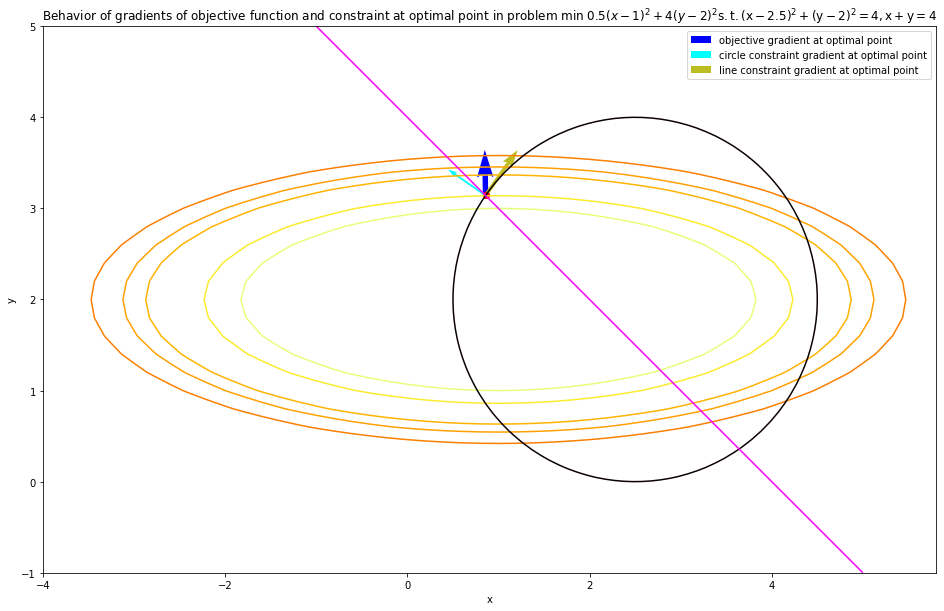

In [ ]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4


fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
contours_paraboloid = ax.contour(x, y, z, [4, 5.226191455200609, 7.5, 8.5, 10], cmap='Wistia')

count = 0

#contours_paraboloid.allsegs contains an empty array as the first element
#From second element onwards, the segment x-y coordinates are present
#print(contours_paraboloid.allsegs)

contour_paraboloid_x = [] 
contour_paraboloid_y = []

count = 0

for item in contours_paraboloid.allsegs:
  if count<2:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_paraboloid_x.append(v[:, 0])
    contour_paraboloid_y.append(v[:, 1])
  else:
    break
  count+=1




contour_paraboloid_x = np.concatenate(contour_paraboloid_x, axis=0) 
contour_paraboloid_y = np.concatenate(contour_paraboloid_y, axis=0) 

optimal_x = np.array([0.8580589092924945])
optimal_y = np.array([3.1419410907075056])
#5.226191455200609

#print(contour_paraboloid_x)

#print(contour_paraboloid_x)
#print(contour_paraboloid_y)

contour_paraboloid_u = (contour_paraboloid_x-1)
contour_paraboloid_v = 8*(contour_paraboloid_y-2)
norm_paraboloid = np.linalg.norm(np.array((contour_paraboloid_u, contour_paraboloid_v)), axis=0)
contour_paraboloid_u = contour_paraboloid_u / norm_paraboloid
contour_paraboloid_v = contour_paraboloid_v / norm_paraboloid
#ax.quiver(contour_paraboloid_x, contour_paraboloid_y, contour_paraboloid_u, contour_paraboloid_v, units='xy', scale=3, color='gray')

contour_paraboloid_u_opt = (optimal_x-1)
contour_paraboloid_v_opt = 8*(optimal_y-2)
#print(contour_paraboloid_u_opt)
#print(contour_paraboloid_v_opt)

norm_paraboloid_opt = np.linalg.norm(np.array((contour_paraboloid_u_opt, contour_paraboloid_v_opt)), axis=0)
#print(contour_paraboloid_opt)

contour_paraboloid_u_opt = contour_paraboloid_u_opt / norm_paraboloid_opt
contour_paraboloid_v_opt = contour_paraboloid_v_opt / norm_paraboloid_opt
ax.scatter(optimal_x, optimal_y,color='red')
ax.quiver(optimal_x, optimal_y, contour_paraboloid_u_opt, contour_paraboloid_v_opt, units='xy', scale=2, color='blue',width=0.06,label='objective gradient at optimal point')

contours_circle = ax.contour(x1, y1, z1, [0.], cmap='hot')

contour_circle_x = [] 
contour_circle_y = []

count = 0
#print(contours_circle.allsegs)

for item in contours_circle.allsegs:
  if count==0:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_circle_x.append(v[:, 0])
    contour_circle_y.append(v[:, 1])
  else:
    break
  count+=1


#print('contour_circle_x',contour_circle_x)
#print('contour_circle_y',contour_circle_y)

contour_circle_x = np.array(contour_circle_x)
contour_circle_y = np.array(contour_circle_y)

contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# # # Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),40)

#ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='purple', width=0.02)

contour_circle_u_opt = 2*(optimal_x-2.5)
contour_circle_v_opt = 2*(optimal_y-2)
#print(contour_paraboloid_u_opt)
#print(contour_paraboloid_v_opt)

norm_circle_opt = np.linalg.norm(np.array((contour_circle_u_opt, contour_circle_v_opt)), axis=0)
#print(contour_paraboloid_opt)

contour_circle_u_opt = contour_circle_u_opt / norm_circle_opt
contour_circle_v_opt = contour_circle_v_opt / norm_circle_opt
ax.quiver(optimal_x, optimal_y, contour_circle_u_opt, contour_circle_v_opt, units='xy', scale=2, color='cyan',width=0.02, label='circle constraint gradient at optimal point')
ax.scatter(optimal_x, optimal_y,color='red')


z_line = x1 + y1 - 4

contours_line = ax.contour(x1, y1, z_line, [0.0], cmap='spring')

contour_line_x = [] 
contour_line_y = []

count = 0
#print(contours_line.allsegs)

contour_line_x = []
contour_line_y = []

for item in contours_line.allsegs:
  if count==0:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_line_x.append(v[:, 0])
    contour_line_y.append(v[:, 1])
  else:
    break
  count+=1


contour_line_u_opt = 1.
contour_line_v_opt = 1.

norm_line_opt = np.linalg.norm(np.array((contour_line_u_opt, contour_line_v_opt)), axis=0)

contour_line_u_opt = contour_line_u_opt / norm_line_opt
contour_circle_v_opt = contour_line_v_opt / norm_line_opt
ax.quiver(optimal_x, optimal_y, contour_line_u_opt, contour_line_v_opt, units='xy', scale=2, color='tab:olive',width=0.04, label='line constraint gradient at optimal point')
ax.scatter(optimal_x, optimal_y,color='red')

ax.set_ylim(-1,5)
ax.set_xlim(-4)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title(r'Behavior of gradients of objective function and constraint at optimal point in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4, x+y=4$')


ax.legend();


$\large{\text{An example with inequality and equality constraints}}$

Consider the optimization problem 

$
\min_{\theta \in {\mathbb{R}}^n} f(\theta)  \ \text{s.t.} \ g_1(\theta)=0, g_2(\theta) \geq 0.
$

As an example, consider the following optimization problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2=4, x+y \geq 4,
$

where $\theta = (x,y)$, objective function is $f(x,y)= \frac{1}{2} (x-1)^2 + 4 (y-2)^2$ and constraints $g_1(x,y) = (x-2.5)^2+(y-2)^2-4$, $g_2(x,y) = x+y-4$. Note that we have now modified the equality constraint in the previous problem to an inequality constraint which represents a halfspace.

In the figure below, we can visualize the contours of the objective function and the circle. The gradient fields are also represented in the figure. 

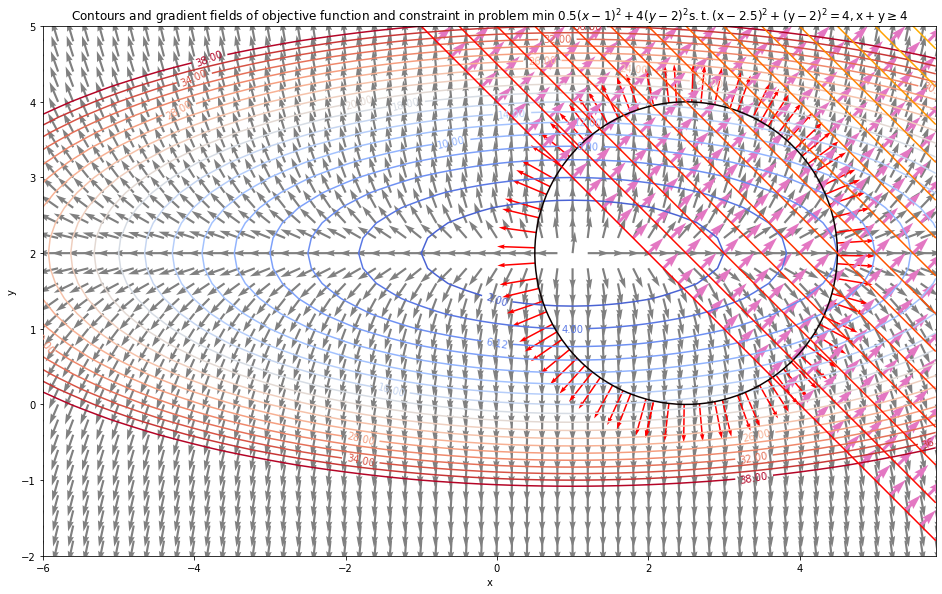

In [24]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2
u = (x-1)
v = 8*(y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4
u1 = 2*(x1-2.5)
v1 = 2*(y1-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((u1, v1)), axis=0)
u1 = u1 / norm1
v1 = v1 / norm1

fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, u, v, units='xy', scale=3.5, color='gray')
obj_fn_level_vals = np.arange(0.,40.,2)
#obj_fn_level_vals = np.sort(np.append(obj_fn_level_vals,[5.226191455200609]))
obj_fn_level_vals[obj_fn_level_vals == 6] = 6.125 #contour for optimal objective function value
contour_obj = ax.contour(x, y, z, obj_fn_level_vals, cmap='coolwarm')

contours_circle = ax.contour(x1, y1, z1, [0.0], cmap='hot')
#ax.quiver(x1, y1, u1, v1, units='xy', scale=5, color='red')

for item in contours_circle.collections:
   for i in item.get_paths():
      v = i.vertices
      contour_circle_x = v[:, 0]
      contour_circle_y = v[:, 1]
      #print(contour_x, contour_y)
contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),2)

#print(idx)
ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='red', width=0.02)

z_line = x + y - 4
line_fn_level_vals = np.arange(0.,10.,0.5)
#line_fn_level_vals[line_fn_level_vals==2.] = 2.5
contours_line = ax.contour(x, y, z_line, line_fn_level_vals, cmap='autumn')
#ax.quiver(x1, y1, u1, v1, units='xy', scale=5, color='red')

contour_line_x = []
contour_line_y = []

#print(contours_line.allsegs)

count = 0
for item in contours_line.allsegs:
  if item != []:
    if count<15:
      #print(item.shape)
      #print(type(item),len(item))
      #print(len(item[0]))
      v = item[0]
      contour_line_x.append(v[:, 0])
      contour_line_y.append(v[:, 1])
    else:
      break
  count+=1

contour_line_x = np.concatenate(contour_line_x, axis=0) 
contour_line_y = np.concatenate(contour_line_y, axis=0) 


# for item in contours_line.collections:
#    for i in item.get_paths():
#       v = i.vertices
#       contour_line_x = v[:, 0]
#       contour_line_y = v[:, 1]
#       #print(contour_x, contour_y)
contour_line_u1 = np.ones(len(contour_line_x))
contour_line_v1 = np.ones(len(contour_line_y))
# Normalize all gradients to focus on the direction not the magnitude
norm_line = np.linalg.norm(np.array((contour_line_u1, contour_line_v1)), axis=0)
contour_line_u1 = contour_line_u1 / norm_line
contour_line_v1 = contour_line_v1 / norm_line

idx = np.arange(0, len(contour_line_x),2)

#print(idx)
ax.quiver(contour_line_x[idx], contour_line_y[idx], contour_line_u1[idx], contour_line_v1[idx], units='xy', scale=3.5, color='tab:pink', width=0.04)


ax.set_ylim(-2,5)
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.clabel(contour_obj, inline=1, fontsize=10)
ax.set_title(r'Contours and gradient fields of objective function and constraint in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4, x+y\geq 4$');


In the figure below, we visualize the behavior of gradients of objective function and the two constraints. 

At the optimal point represented by a red dot below, we can visualize the alignment of the gradient of the objective function (blue arrow) and the gradient of the equality constraint (cyan arrow) and the gradient of inequality constraint (green arrows). 

Here too, we can see that the gradient of objective function appears to belong to a space spanned by the constraint gradients. However the gradient corresponding to the inequality constraint does not seem to play a role in the alignment of the gradient of objective function. 

This observation motivates an optimality condition of the form: 

$
\nabla_\theta f(\theta^\star) = \lambda_1 \nabla_\theta g_1(\theta^\star) + \lambda_2 \nabla_\theta g_2(\theta^\star), 
$

where $\lambda_1, \lambda_2 \in {\mathbb{R}}$ and a possibility of $\lambda_2=0$. 

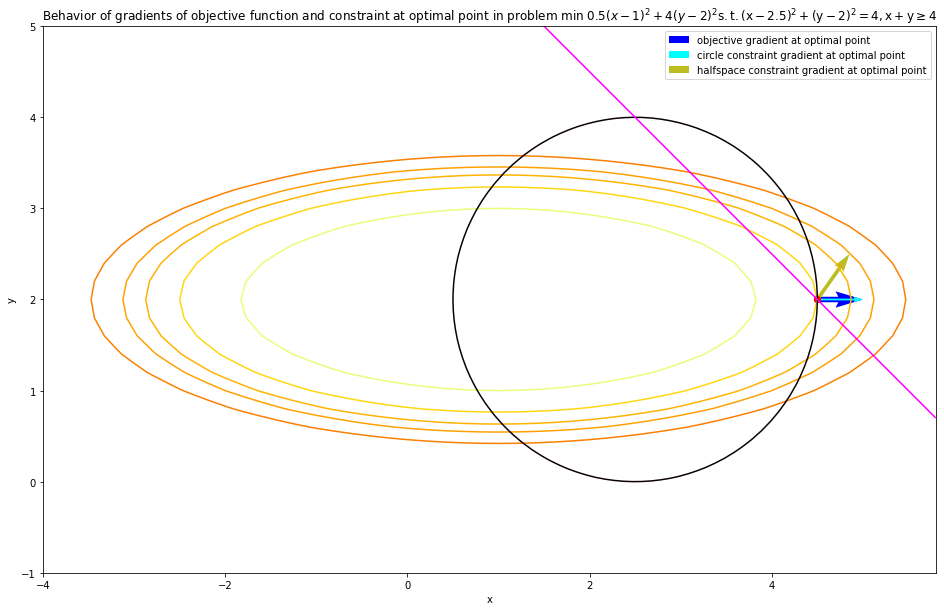

In [26]:
#@title
feature_x = np.arange(-6, 6, 0.2)
feature_y = np.arange(-6, 6, 0.2)

x, y = np.meshgrid(feature_x, feature_y)

z = 0.5*(x-1)**2 + 4*(y-2)**2

feature_x1 = np.linspace(-5, 5, 100)
feature_y1 = np.linspace(-5, 5, 100)

x1, y1 = np.meshgrid(feature_x1, feature_y1)

z1 = (x1-2.5)**2 + (y1-2)**2 - 4


fig, ax = plt.subplots(1, 1, figsize=(16,16))
ax.set_aspect(1)
contours_paraboloid = ax.contour(x, y, z, [4, 6.125, 7.5, 8.5, 10], cmap='Wistia')

count = 0

#contours_paraboloid.allsegs contains an empty array as the first element
#From second element onwards, the segment x-y coordinates are present
#print(contours_paraboloid.allsegs)

contour_paraboloid_x = [] 
contour_paraboloid_y = []

count = 0

for item in contours_paraboloid.allsegs:
  if count<2:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_paraboloid_x.append(v[:, 0])
    contour_paraboloid_y.append(v[:, 1])
  else:
    break
  count+=1




contour_paraboloid_x = np.concatenate(contour_paraboloid_x, axis=0) 
contour_paraboloid_y = np.concatenate(contour_paraboloid_y, axis=0) 

optimal_x = np.array([4.5])
optimal_y = np.array([2])
#6.125

#print(contour_paraboloid_x)

#print(contour_paraboloid_x)
#print(contour_paraboloid_y)

contour_paraboloid_u = (contour_paraboloid_x-1)
contour_paraboloid_v = 8*(contour_paraboloid_y-2)
norm_paraboloid = np.linalg.norm(np.array((contour_paraboloid_u, contour_paraboloid_v)), axis=0)
contour_paraboloid_u = contour_paraboloid_u / norm_paraboloid
contour_paraboloid_v = contour_paraboloid_v / norm_paraboloid
#ax.quiver(contour_paraboloid_x, contour_paraboloid_y, contour_paraboloid_u, contour_paraboloid_v, units='xy', scale=3, color='gray')

contour_paraboloid_u_opt = (optimal_x-1)
contour_paraboloid_v_opt = 8*(optimal_y-2)
#print(contour_paraboloid_u_opt)
#print(contour_paraboloid_v_opt)

norm_paraboloid_opt = np.linalg.norm(np.array((contour_paraboloid_u_opt, contour_paraboloid_v_opt)), axis=0)
#print(contour_paraboloid_opt)

contour_paraboloid_u_opt = contour_paraboloid_u_opt / norm_paraboloid_opt
contour_paraboloid_v_opt = contour_paraboloid_v_opt / norm_paraboloid_opt
ax.scatter(optimal_x, optimal_y,color='red')
ax.quiver(optimal_x, optimal_y, contour_paraboloid_u_opt, contour_paraboloid_v_opt, units='xy', scale=2, color='blue',width=0.06,label='objective gradient at optimal point')

contours_circle = ax.contour(x1, y1, z1, [0.], cmap='hot')

contour_circle_x = [] 
contour_circle_y = []

count = 0
#print(contours_circle.allsegs)

for item in contours_circle.allsegs:
  if count==0:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_circle_x.append(v[:, 0])
    contour_circle_y.append(v[:, 1])
  else:
    break
  count+=1


#print('contour_circle_x',contour_circle_x)
#print('contour_circle_y',contour_circle_y)

contour_circle_x = np.array(contour_circle_x)
contour_circle_y = np.array(contour_circle_y)

contour_circle_u1 = 2*(contour_circle_x-2.5)
contour_circle_v1 = 2*(contour_circle_y-2)

# # # Normalize all gradients to focus on the direction not the magnitude
norm1 = np.linalg.norm(np.array((contour_circle_u1, contour_circle_v1)), axis=0)
contour_circle_u1 = contour_circle_u1 / norm1
contour_circle_v1 = contour_circle_v1 / norm1

idx = np.arange(0, len(contour_circle_x),40)

#ax.quiver(contour_circle_x[idx], contour_circle_y[idx], contour_circle_u1[idx], contour_circle_v1[idx], units='xy', scale=2, color='purple', width=0.02)

contour_circle_u_opt = 2*(optimal_x-2.5)
contour_circle_v_opt = 2*(optimal_y-2)
#print(contour_paraboloid_u_opt)
#print(contour_paraboloid_v_opt)

norm_circle_opt = np.linalg.norm(np.array((contour_circle_u_opt, contour_circle_v_opt)), axis=0)
#print(contour_paraboloid_opt)

contour_circle_u_opt = contour_circle_u_opt / norm_circle_opt
contour_circle_v_opt = contour_circle_v_opt / norm_circle_opt
ax.quiver(optimal_x, optimal_y, contour_circle_u_opt, contour_circle_v_opt, units='xy', scale=2, color='cyan',width=0.02, label='circle constraint gradient at optimal point')
ax.scatter(optimal_x, optimal_y,color='red')


z_line = x + y - 4

contours_line = ax.contour(x, y, z_line, [2.5], cmap='spring')

contour_line_x = [] 
contour_line_y = []

count = 0
#print(contours_line.allsegs)

contour_line_x = []
contour_line_y = []

for item in contours_line.allsegs:
  if count==0:
    #print(item.shape)
    #print(type(item),len(item))
    #print(len(item[0]))
    v = item[0]
    contour_line_x.append(v[:, 0])
    contour_line_y.append(v[:, 1])
  else:
    break
  count+=1


contour_line_u_opt = 1.
contour_line_v_opt = 1.

norm_line_opt = np.linalg.norm(np.array((contour_line_u_opt, contour_line_v_opt)), axis=0)

contour_line_u_opt = contour_line_u_opt / norm_line_opt
contour_circle_v_opt = contour_line_v_opt / norm_line_opt
ax.quiver(optimal_x, optimal_y, contour_line_u_opt, contour_line_v_opt, units='xy', scale=2, color='tab:olive',width=0.04, label='halfspace constraint gradient at optimal point')
ax.scatter(optimal_x, optimal_y,color='red')

ax.set_ylim(-1,5)
ax.set_xlim(-4)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title(r'Behavior of gradients of objective function and constraint at optimal point in problem $\min \; 0.5(x-1)^2 + 4(y-2)^2 \rm{s.t.} (x-2.5)^2 + (y-2)^2 = 4, x+y\geq 4$')


ax.legend();


$\large{\text{Exercise}}$

1. Consider the optimization problem 

$
\min_{\theta \in {\mathbb{R}}^n} f(\theta)  \ \text{s.t.} \ g_1(\theta)\leq 0, g_2(\theta)\leq 0.
$

As an example, consider the following optimization problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2\leq 4, x+y \leq 4,
$

where $\theta = (x,y)$, objective function is $f(x,y)= \frac{1}{2} (x-1)^2 + 4 (y-2)^2$ and constraints $g_1(x,y) = (x-2.5)^2+(y-2)^2-4$, $g_2(x,y) = x+y-4$. 

Note that when compared to the previous problems, we have considered all points in the interior of circle and all points on the halfspace towards the left of the line. 

Try to visualize the contours and gradient fields of objective function and constraints. Understand the behavior of the gradients at optimal solution.

2. Try to visualize the contours and gradient fields of objective function and constraints for the problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2\leq 4, x+y \geq 4,
$

 Understand the behavior of the gradients at optimal solution.

3. Try to visualize the contours and gradient fields of objective function and constraints for the problem: 

$
\min_{ (x,y) \in {\mathbb{R}}^2} \frac{1}{2} (x-1)^2 + 4 (y-2)^2 \ \text{s.t.} \ (x-2.5)^2+(y-2)^2\leq 4, x+y = 4.
$

 Understand the behavior of the gradients at optimal solution.

4. Based on the observations in the problems above, try to guess how the gradients of objective function and constraints would be related. 


$\large{\text{Reference}}$

1. Bertsekas, D.P. Nonlinear Programming. Athena Scientific, 1999.
